# Tensorflow Introduction

## Our goal is to map handwritten digits to their integer values

The problem is that the form we are given the hand written digits in is pixel values
You can imagine trying to think of rules to take a huge matrix and accurately convert that
into a single digit

## MNIST Dataset

This dataset is a series of 28 by 28 images of hand written digits and the number (0-9) that they represent
Its a incredibly well researched dataset in machine learning and a common starting place

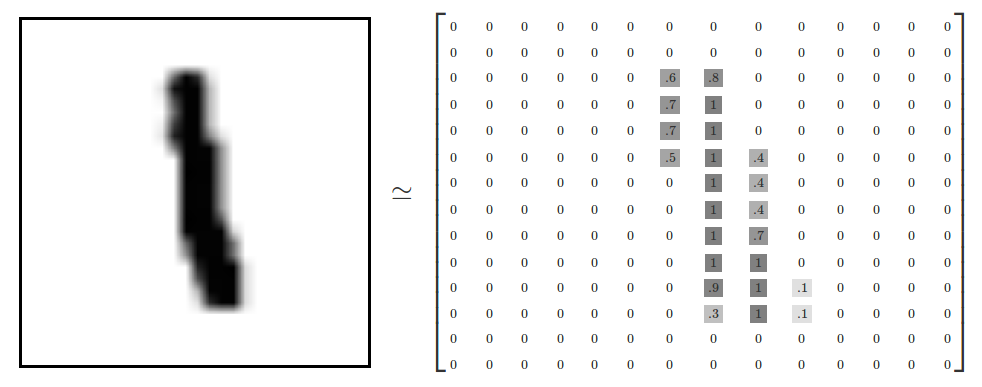

## Our approach

The field of machine leaerning is full of different models that perform well for different datasets but what we are going to do today is look at the most simple example of using tensorflow and the ideas of machine learning.

Our approach will be very similar to y=mx+b where all of the variables are representative of matrix's

To simplify this we will flatten out our images into lines of 784 (28*28) pixels

So now assume we had a myster matrix that (10x784) and another mystery matrix that is (1x10)

So assuming we have the correct mystery matrices then if we multiply our input matrix by the 10x784 matrix and add the 1x10 matrix we get out a 1x10 matrix that has the probabilities for each of the 10 possible numbers so if we take the index of the maximum that is our answer

# Now to Tensorflow and the code

# Imports

In [1]:
import tensorflow as tf
#for graphing
import matplotlib.pyplot as plt
#for datavisualization
import seaborn

C:\Users\Andrew Laird\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Tensorflow placeholders

Placeholders serve as inputs for data into your model

In [2]:
X = tf.placeholder(tf.float32, shape= [None,784])
Y = tf.placeholder(tf.float32, shape= [None,10])
#None means that you can feed any amount of matrices into that position
#the other number is the finite part of the dimension of that placeholder

## Tensorflow Variables

Tensorflow variables are modified by tensorflow when using one of the optimizers
we will initilize ours to zero for now

In [3]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

## Constructing a model

Models in tensorflow are interesting, they are made by connecting parts and building from input layer to output layer

In [4]:
#y = (WX) + b
#WX
mul = tf.matmul(X,W) #will come out to be a 1x10 matrix
#WX+b
pred = mul + b #add the weights

#now we want to threshold between 0 and 1
thresholded_pred = tf.nn.softmax(pred)

## Tensorflow sessions

Tensorflow computes models in something called sessions, they are ways to train and use models here we are running our model with a random input but because we initialized our matrixes to zero we get zeros out

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(pred, feed_dict={X:[[x for x in range(0,784)]]}))

# Training

To train our models we use some sort of optimizer, in this case we will be using the gradient descent optimizer. Gradient Decent takes a fitness value at each point and changes weights slightly using derivatives to reach a local minimum

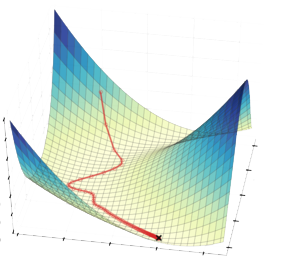

## But we need a value to run through our optimizer

In [5]:
#we will be using squared error as our value to optimize
val = tf.argmax(thresholded_pred,axis=1)
correct_val = tf.argmax(Y,axis=1)

In [6]:
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(thresholded_pred), reduction_indices=1))

In [7]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

In [8]:
optimizer = optimizer.minimize(cost)

## Getting the mnist dataset

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
def array_to_num(flat_num):
    result = [[0 for _ in range(28)]for a_ in range(28)]
    for i in range(784):
        result[i//28][i%28] = flat_num[i]
    return result

In [11]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    #train on 30 data points
    batch_xs, batch_ys = mnist.train.next_batch(30)
    sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_ys})
    # Test model
    correct_prediction = tf.equal(tf.argmax(thresholded_pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", sess.run(accuracy,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    print(sess.run(correct_val,feed_dict={X: batch_xs, Y: batch_ys}))
    print(sess.run(val,feed_dict={X: batch_xs}))


Accuracy: 0.2164
[4 3 3 7 0 4 0 3 3 6 0 1 1 1 6 2 6 5 5 9 1 3 7 4 5 2 4 2 0 3]
[4 3 3 3 0 3 0 3 3 3 0 1 1 1 3 3 6 3 3 3 3 3 3 4 3 2 3 3 0 3]


As you can see with only 30 data points our classifier really seems to like one number
hopefully it can grow past that with a little more training

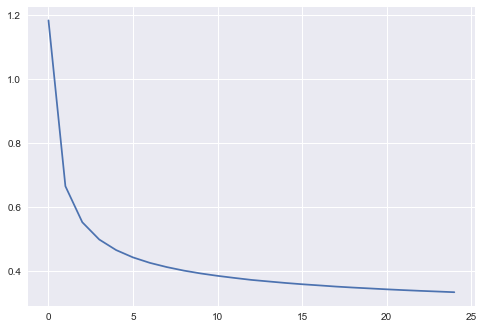

Optimization Finished!


In [12]:
#now lets train alot
training_epochs = 25
batch_size = 100
display_step = 1

init = tf.global_variables_initializer()
sess = tf.Session();

sess.run(init)

points = [];
plot = plt.plot([x for x in range(len(points))],points);
for epoch in range(training_epochs):
    #train on 100 data points
    avg_cost = 0;
    total_batch = int(mnist.train.num_examples/batch_size)
    for batch in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        o,c = sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_ys})
        # Compute average loss
        avg_cost += c / total_batch
    if(epoch%display_step == 0):
        if(epoch!=training_epochs-1):
                plt.close()
        points.append(avg_cost)
        #print(avg_cost)
plt.plot([x for x in range(len(points))],points)
plt.show()
print("Optimization Finished!")




In [13]:
# Test model
correct_prediction = tf.equal(tf.argmax(thresholded_pred, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))


Accuracy: 0.914



Prediction:
[7]
[[ 0.11838178 -6.14563     0.21549347  2.4760425  -1.9466923  -0.86795974
  -4.9186535   8.840372   -0.2533972   2.48204   ]]


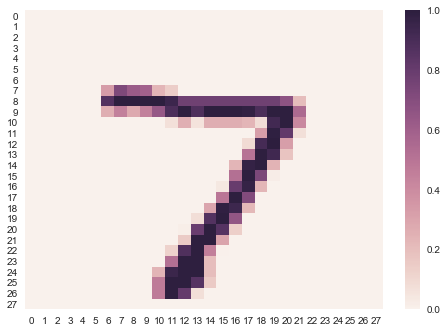


Prediction:
[2]
[[ 3.0932922 -1.4944847  7.442573   3.3835673 -8.050074   3.4492683
   4.64633   -9.006554   2.4942517 -5.958173 ]]


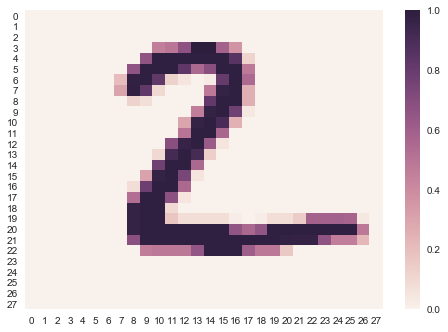


Prediction:
[1]
[[-3.538781    5.330489    1.137562    0.32963115 -1.9511505  -0.7850505
  -0.13069814  0.06415389  0.6344342  -1.0905924 ]]


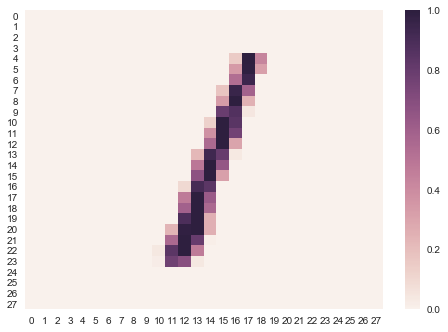


Prediction:
[0]
[[ 9.410332   -9.465255    1.034498   -0.41050386 -5.6563625   2.5177178
   1.8279762   0.9258796   0.4396876  -0.62398344]]


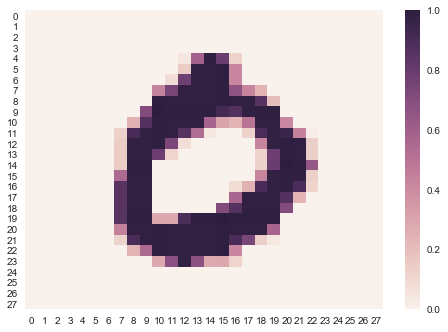


Prediction:
[4]
[[-1.0862486  -5.3468447   0.54823667 -2.1036677   5.0127144  -1.498113
   0.4176753   1.0913212   0.72550607  2.2394178 ]]


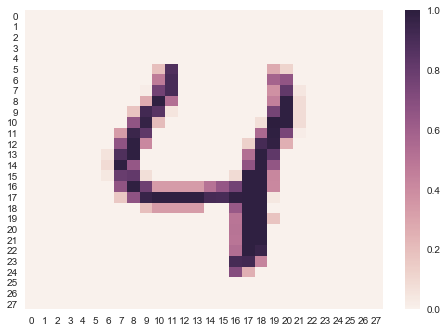

In [14]:
#show some examples
for x in range(5):
    num = mnist.test.images[x]
    num_2d = array_to_num(num)
    #seaborn.heatmap(num_2d)
    print()
    print("Prediction:")
    print(sess.run(val,feed_dict={X:[num]}))
    print(sess.run(pred,feed_dict={X:[num]}))
    seaborn.heatmap(num_2d)
    plt.show()

Now lets visualize what the computer thinks each digit looks like

0


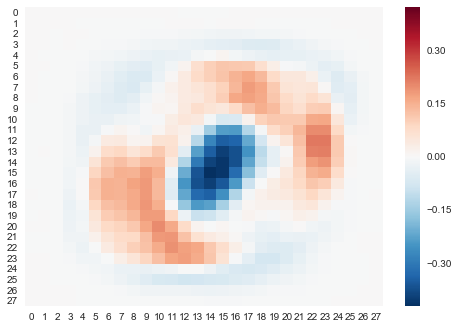

1


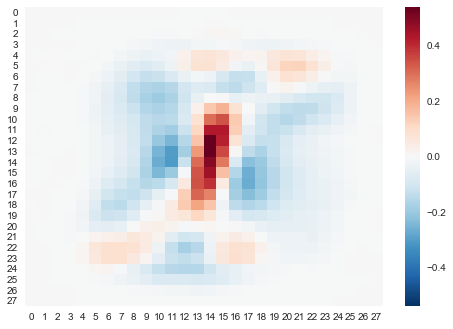

2


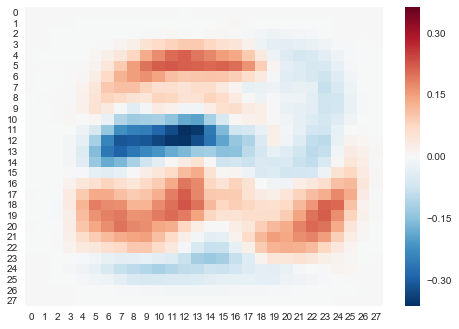

3


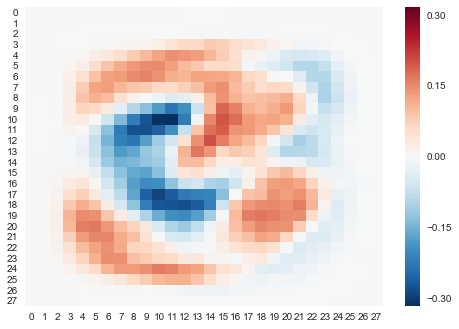

4


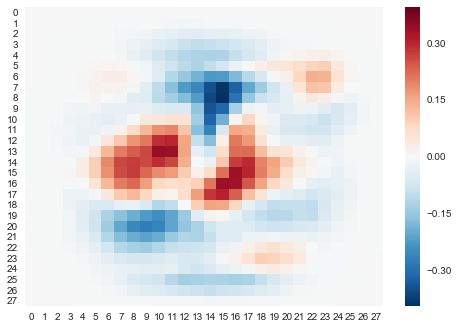

5


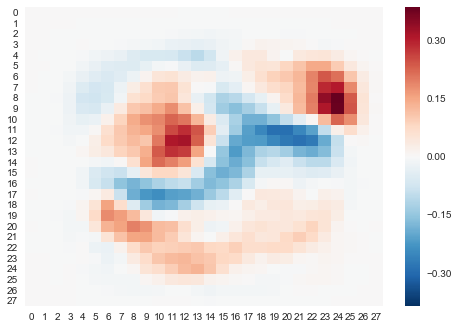

6


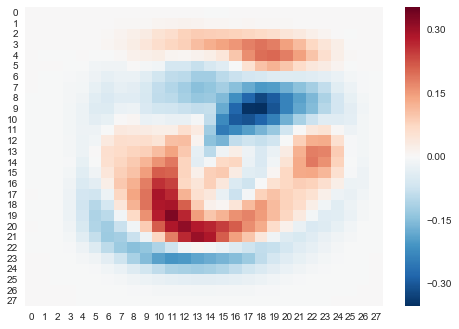

7


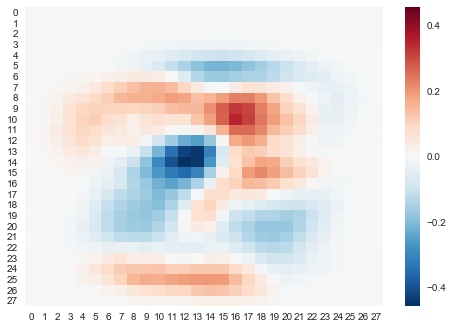

8


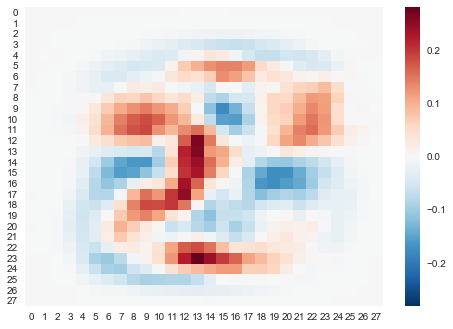

9


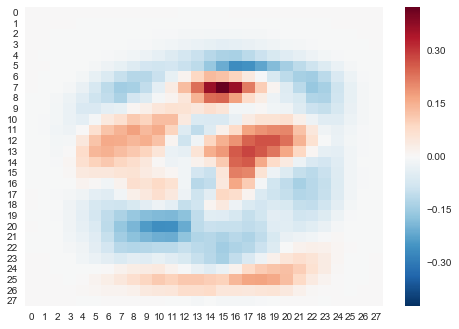

In [15]:
all_nums = sess.run(W)
for x in range(10):
    print(x)
    seaborn.heatmap(array_to_num([all_nums[i][x] for i in range(784)]))
    plt.show()

In [16]:
sess.close()